<a href="https://colab.research.google.com/github/Himangi-77/Python_codes/blob/main/DBSCAN_Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data = data.drop(['CustomerID'], axis=1)

In [ ]:
data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending Score'},inplace=True)

In [ ]:
data[data.duplicated()]

,Gender,Age,Income,Spending Score


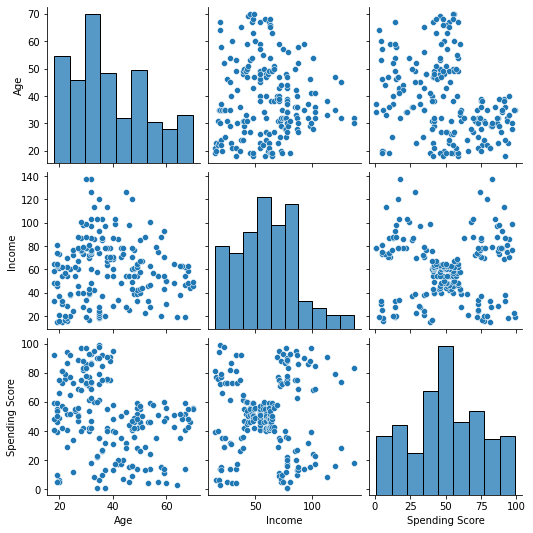

In [ ]:
sns.pairplot(data)

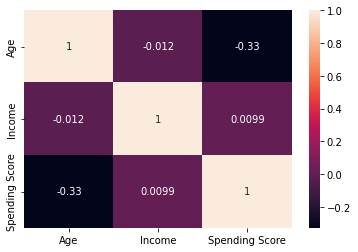

In [ ]:
sns.heatmap(data.corr(),annot=True)

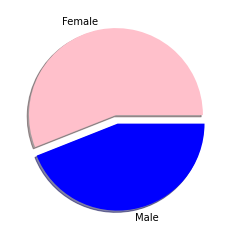

In [ ]:
size=data['Gender'].value_counts()
label = ['Female','Male']
explode = [0,0.1]
color = ['Pink','Blue']
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


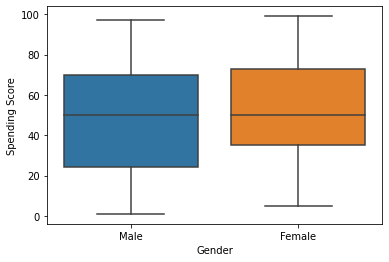

In [ ]:
sns.boxplot(data['Gender'],data['Spending Score'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 64 Text major ticklabel objects>)

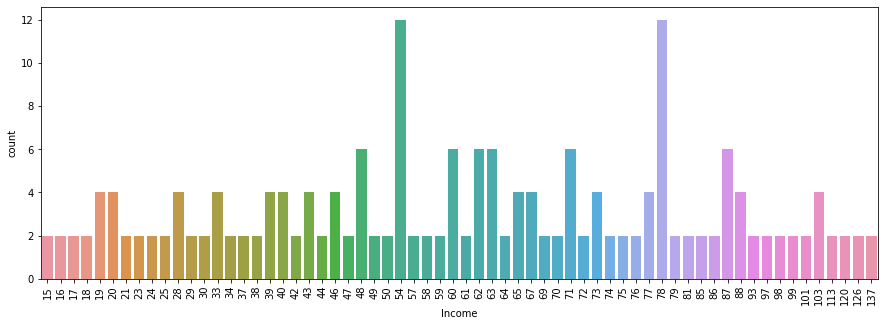

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data['Income'])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

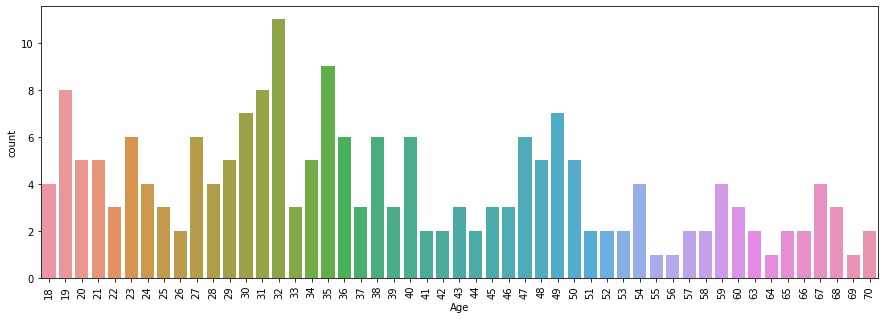

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data['Age'])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Income in Thousands($)')

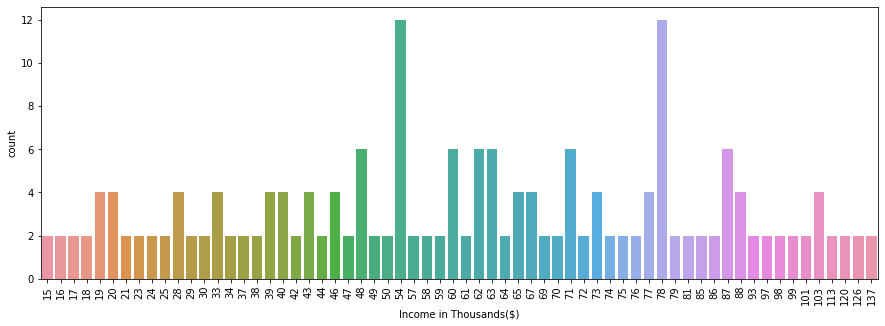

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data['Income'])
plt.xticks(rotation=90)
plt.xlabel('Income in Thousands($)')

In [ ]:
x = data.iloc[:,[2,3]]

In [ ]:
db = DBSCAN(eps=2,min_samples=3,metric='euclidean')
db.fit(x)

DBSCAN(eps=2, min_samples=3)

In [ ]:
labels = set(db.labels_)

In [ ]:
db.core_sample_indices_

array([ 10,  12,  14,  57,  58,  62,  63,  64,  65,  66,  67,  68,  74,
        75,  76,  77,  78,  79,  80,  81,  83,  85,  91,  92,  93,  94,
        97,  98,  99, 100, 101, 103, 105, 106, 107, 108, 109, 110, 111,
       112, 114, 115, 116, 134, 149, 151, 155, 174])

In [ ]:
sample_core = np.zeros_like(labels,dtype=bool)

In [ ]:
sample_core[db.core_sample_indices_]=True

In [ ]:
n_clusters=len(set(labels))-1
print('No of clusters:',n_clusters)

No of clusters: 11


In [81]:
y_means = db.fit_predict(x)

In [83]:
y_means.shape

(200,)

In [84]:
x['ClusterID'] = y_means

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
x

,Income,Spending Score,ClusterID
0,15,39,-1
1,15,81,-1
2,16,6,-1
3,16,77,-1
4,17,40,-1
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1


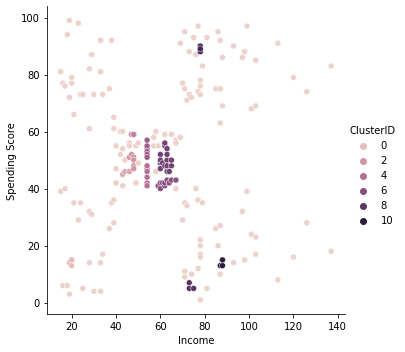

In [86]:
sns.relplot(x='Income',y='Spending Score',data=x,hue='ClusterID')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


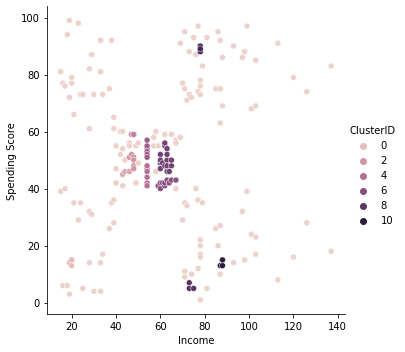